# File and libraries

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_encoded.csv'


file_tag = "df_merch_mv_input"

# DSLabs functions

In [101]:
%run "scripts/dslabs_functions.py"


# Data functions

In [102]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [103]:
test_data=True
# test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.05, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    data=data.sample(frac=0.5, replace=False)

 


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18586 entries, 353473 to 62037
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event_name                       18586 non-null  int64  
 1   device_category                  18586 non-null  int64  
 2   device_mobile_brand_name         18586 non-null  int64  
 3   device_mobile_model_name         18586 non-null  float64
 4   device_operating_system          18586 non-null  int64  
 5   device_operating_system_version  12969 non-null  float64
 6   device_language                  9968 non-null   float64
 7   device_web_info_browser          18586 non-null  int64  
 8   device_web_info_browser_version  18113 non-null  float64
 9   geo_country                      18586 non-null  int64  
 10  geo_region                       18369 non-null  float64
 11  geo_city                         17623 non-null  float64
 12  traffic_source_med

# MV 1 - Most Frequent

In [104]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling


data_1 =  mvi_by_filling(data, strategy="frequent")

data_1.describe()


,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,...,day_cos,day_of_week_nr_sin,day_of_week_nr_cos,geo_country,session_engaged,returning_user,year,quarter,is_weekend,domain
count,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,...,18586.000000,1.858600e+04,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000
mean,6.811310,1.812386,4.759066,10.410954,3.710750,4.570746,6.802167,2.185677,4.331972,2998.790680,...,-0.065216,7.832717e-02,0.077236,1.142365,0.916066,0.261487,1.260949,1.260949,0.197299,1.966157
std,1.858649,0.971667,1.362338,3.022266,1.588616,2.419335,1.542822,0.642593,1.780758,1751.262742,...,0.698876,6.571444e-01,0.745731,0.349434,0.277296,0.439456,0.439164,0.439164,0.397971,0.180829
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.994869,-8.660254e-01,-1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.802167,2.000000,3.000000,1580.000000,...,-0.758758,-2.449294e-16,-0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.570746,6.802167,2.000000,4.000000,3621.000000,...,-0.050649,0.000000e+00,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,5.000000,8.000000,2.000000,4.000000,4382.000000,...,0.688967,8.660254e-01,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,6491.000000,...,1.000000,8.660254e-01,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


## MV1 evaluation prep

### mv1 target

In [105]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_1[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_1[data_1[target] == negative]),
        len(data_1[data_1[target] == positive]),
    ]
}

y: array = data_1.pop(target).to_list()
X: ndarray = data_1.values

Labels=[0.0, 1.0]


### mv1 split

<Axes: title={'center': 'Data distribution per dataset'}>

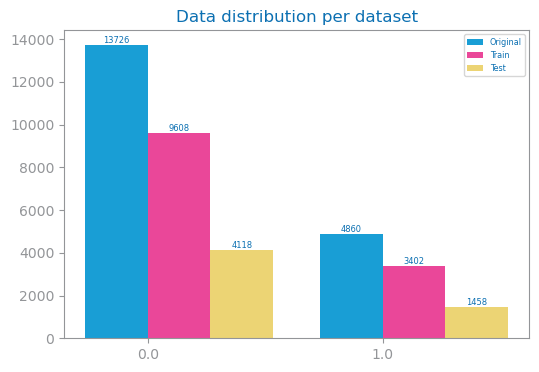

In [106]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_1.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_1.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## mv1 naive bayes evaluation

In [107]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.729
Score over Test: 0.731


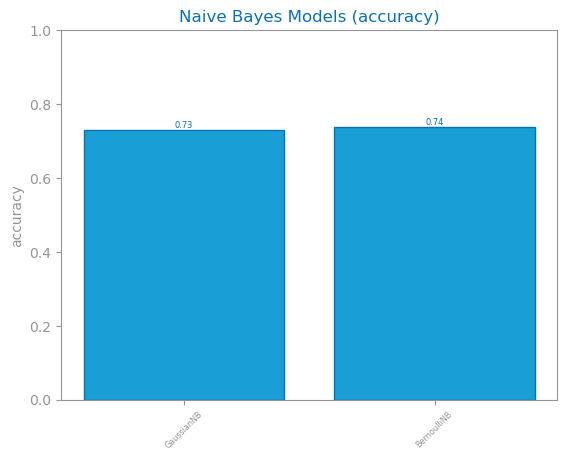

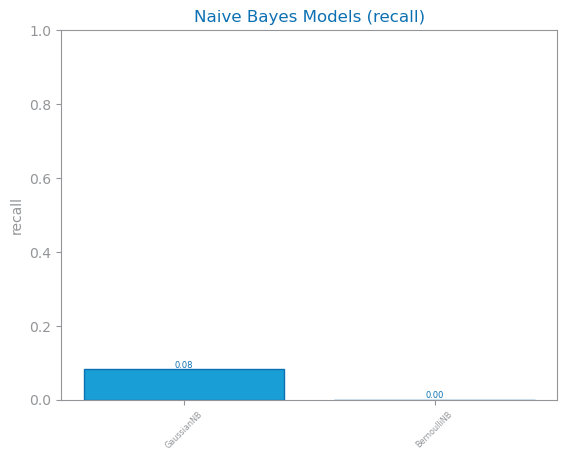

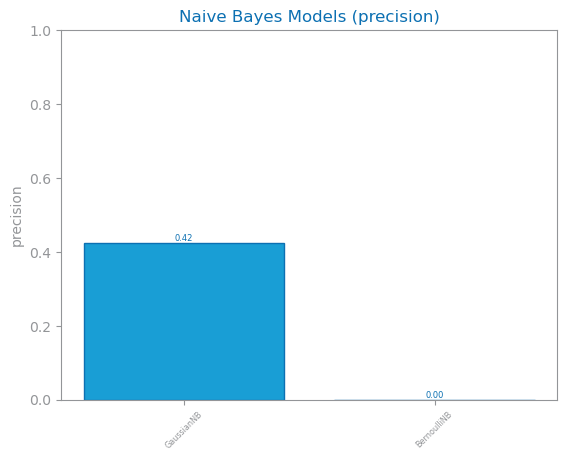

In [108]:

figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "accuracy")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "recall")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "precision")


# savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
show()

### mv1 nayve bayes accuracy, recall, precision

In [109]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.731 recall=0.082 precision=0.423


### mv1 nayve bayes performance analysis

<Figure size 640x480 with 0 Axes>

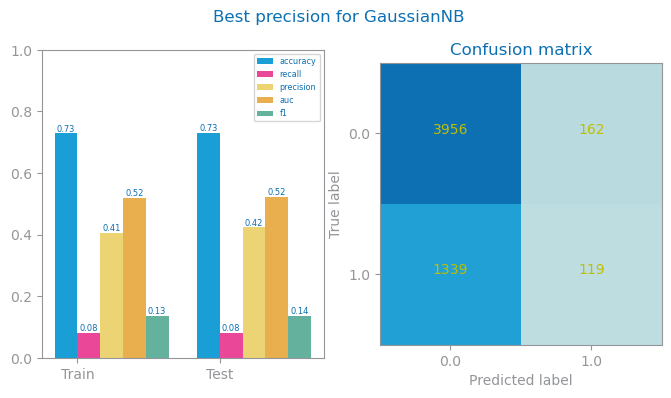

In [110]:
from dslabs_functions import plot_evaluation_results

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### mv 1 naive bayes confusion matrix

In [111]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[3956  162]
 [1339  119]]


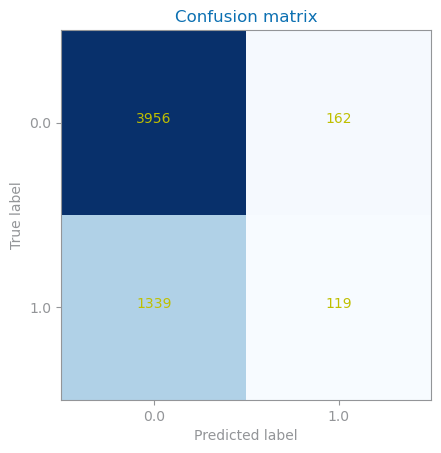

In [112]:
figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()

## mv1 KNN evaluation

### mv1 knn accuracy

KNN best with k=23 and manhattan


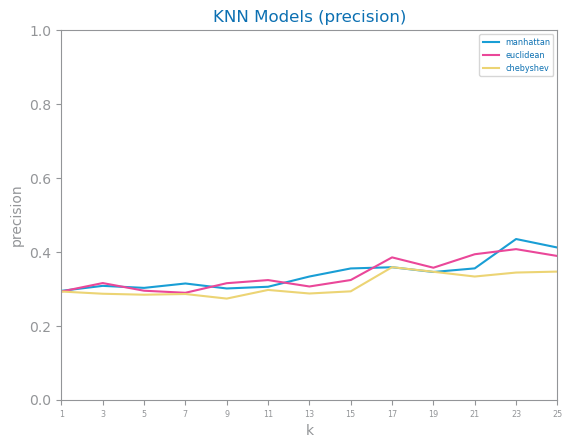

In [113]:
from typing import Literal
from numpy import array, ndarray
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart
from dslabs_functions import read_train_test_from_files, plot_evaluation_results

def knn_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, k_max: int=19, lag: int=2, metric='accuracy'
        ) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']

    kvalues: list[int] = [i for i in range(1, k_max+1, lag)]
    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance: float = eval
                best_params['params'] = (k, d)
                best_model = clf
            # print(f'KNN {d} k={k}')
        values[d] = y_tst_values
    print(f'KNN best with k={best_params['params'][0]} and {best_params['params'][1]}')
    plot_multiline_chart(kvalues, values, title=f'KNN Models ({metric})', xlabel='k', ylabel=metric, percentage=True)

    return best_model, best_params


eval_metric = 'precision'

best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

### mv1 knn best performance

<Figure size 640x480 with 0 Axes>

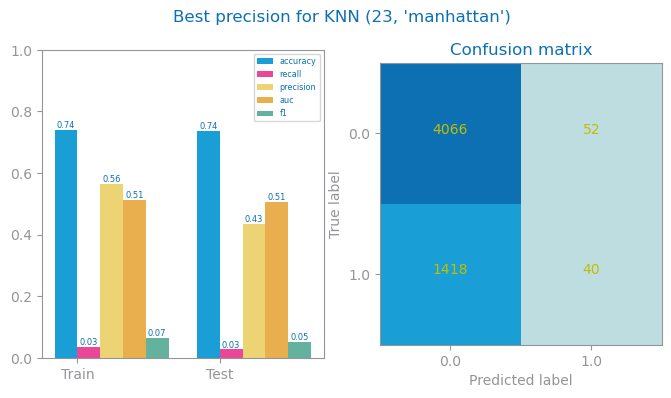

In [114]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### mv1 knn overfitting

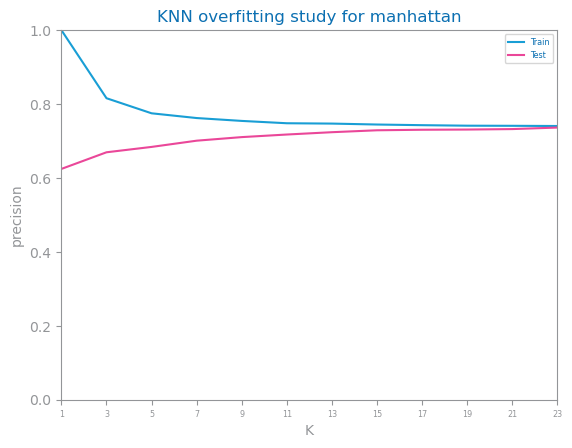

In [115]:
from matplotlib.pyplot import figure, savefig

distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
# savefig(f"images/{file_tag}_knn_overfitting.png")
show()

# MV 2 - KNN input (sample only)

In [116]:
if test_data==False:
    data=data.sample(frac=0.1, replace=False)


data_2 = mvi_by_filling(data, strategy="knn")


data_2.describe()

,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_country,...,local_hour_sin,local_hour_cos,local_minute_sin,local_minute_cos,hour_minute_fraction_sin,hour_minute_fraction_cos,day_sin,day_cos,day_of_week_nr_sin,day_of_week_nr_cos
count,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,...,1.858600e+04,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,18586.000000,1.858600e+04,18586.000000
mean,6.811310,1.812386,4.759066,10.410954,3.710750,4.572366,6.777187,2.185677,4.331841,1.142365,...,-6.580931e-03,0.044898,0.010762,0.022658,0.716646,0.215183,0.039440,-0.065216,7.832717e-02,0.077236
std,1.858649,0.971667,1.362338,3.022266,1.588616,2.522060,1.686567,0.642593,1.785662,0.349434,...,6.946399e-01,0.717962,0.701720,0.712049,0.276621,0.603009,0.711208,0.698876,6.571444e-01,0.745731
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-9.976688e-01,-0.990686,-0.999646,-0.998583,0.000000,-0.832135,-0.998717,-0.994869,-8.660254e-01,-1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.000000,2.000000,3.000000,1.000000,...,-7.308360e-01,-0.576680,-0.678312,-0.697632,0.573043,-0.342243,-0.651372,-0.758758,-2.449294e-16,-0.500000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.400000,7.400000,2.000000,4.000000,1.000000,...,-2.449294e-16,0.203456,0.000000,0.079786,0.800802,0.280525,0.101168,-0.050649,0.000000e+00,0.500000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,6.000000,8.000000,2.000000,4.000000,1.000000,...,7.308360e-01,0.682553,0.716457,0.734774,0.949398,0.807135,0.724793,0.688967,8.660254e-01,1.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,2.000000,...,9.976688e-01,1.000000,0.999646,1.000000,1.000000,1.000000,0.998717,1.000000,8.660254e-01,1.000000


## MV2 train test split

### mv2 target

In [117]:

target = "returning_user"
labels: list = list(data_2[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_2[data_2[target] == negative]),
        len(data_2[data_2[target] == positive]),
    ]
}

y: array = data_2.pop(target).to_list()
X: ndarray = data_2.values

Labels=[0.0, 1.0]


### mv2 split

<Axes: title={'center': 'Data distribution per dataset'}>

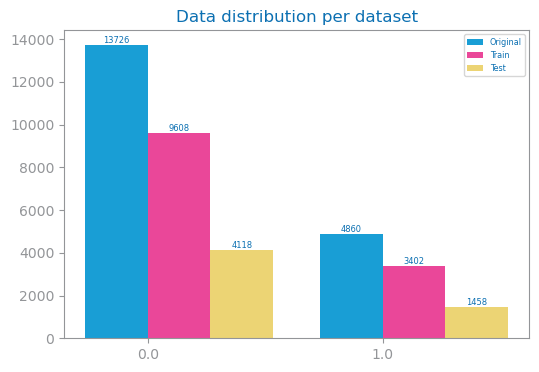

In [118]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_2.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_2.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## mv2 naive bayes

In [119]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

clf = BernoulliNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.739
Score over Test: 0.739


### mv2 naive bayes accuracy, recall, precision

In [120]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.739 recall=0.000 precision=0.000


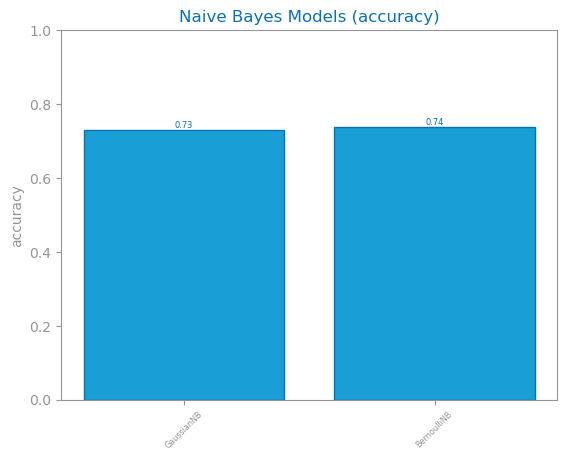

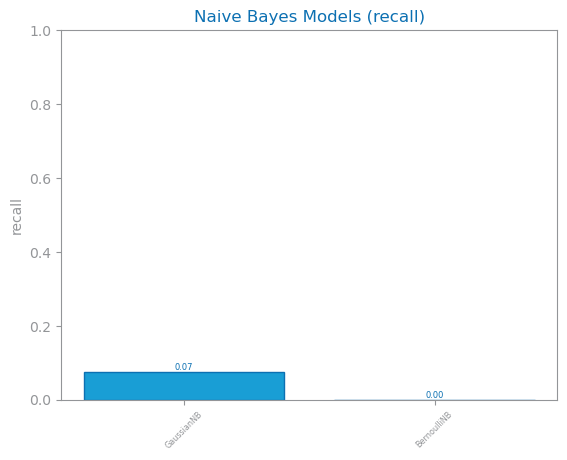

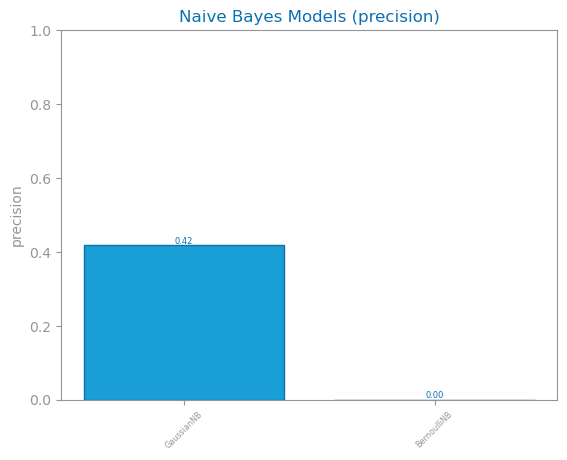

In [121]:

figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "accuracy")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "recall")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "precision")


# savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
show()

### mv 2 naive bayes confusion matrix

In [122]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[4118    0]
 [1458    0]]


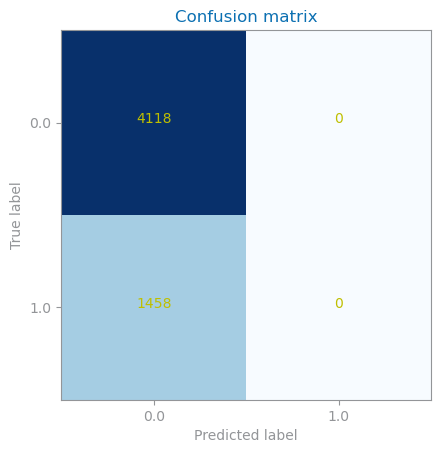

In [123]:
figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()

# mv2 KNN evaluation

### mv2 knn accuracy

KNN best with k=23 and euclidean


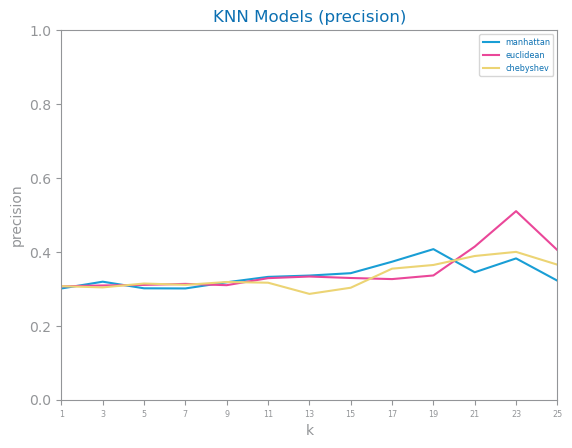

In [124]:
eval_metric = 'precision'

best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

### mv2 knn best performance

<Figure size 640x480 with 0 Axes>

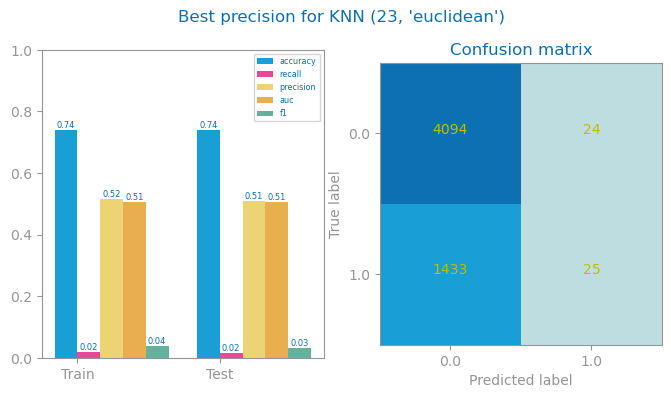

In [125]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### mv2 knn overfitting

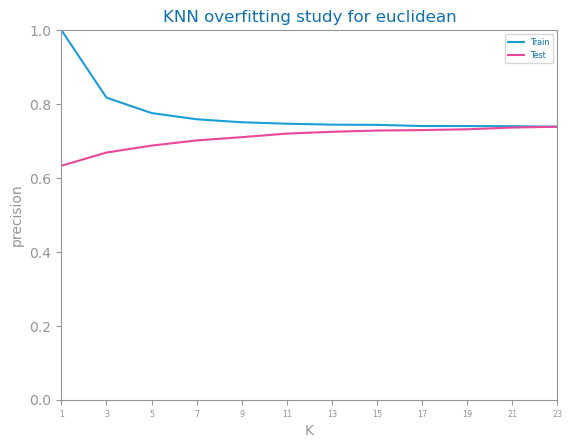

In [126]:
distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
# savefig(f"images/{file_tag}_knn_overfitting.png")
show()

# MV3 - drop nulls

In [127]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

data_3 = data.dropna(axis=1, how="any", inplace=False)

## mv3 target

In [128]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_3[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_3[data_3[target] == negative]),
        len(data_3[data_3[target] == positive]),
    ]
}

y: array = data_3.pop(target).to_list()
X: ndarray = data_3.values

Labels=[0, 1]


## mv3 split

<Axes: title={'center': 'Data distribution per dataset'}>

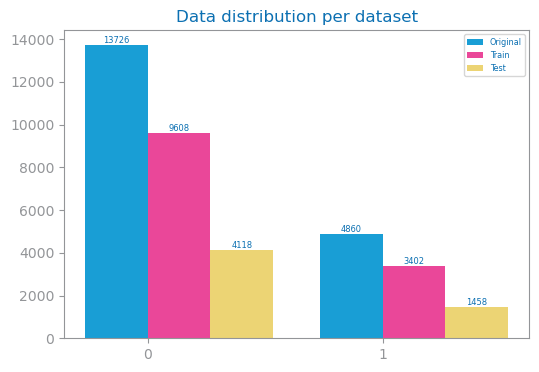

In [129]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_3.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_3.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## mv3 naive bayes

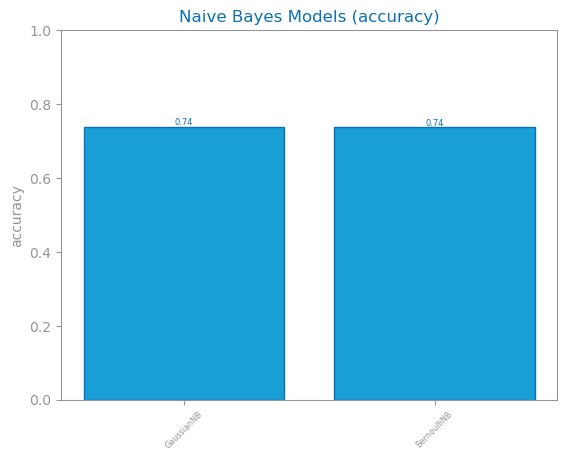

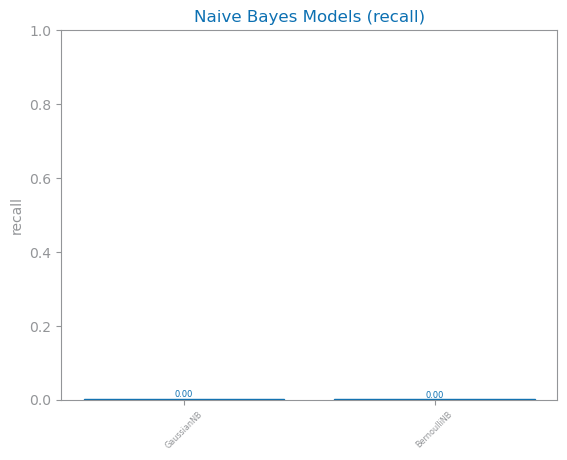

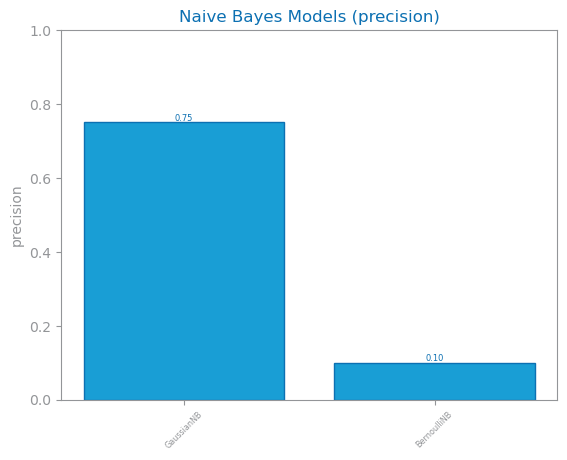

In [130]:
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "accuracy")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "recall")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "precision")


# savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
show()

In [131]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.739
Score over Test: 0.739


### mv3 naive bayes accuracy, recall, precision

In [132]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.739 recall=0.002 precision=0.750


### mv3 naive bayes confusion matrix

In [133]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[4117    1]
 [1455    3]]


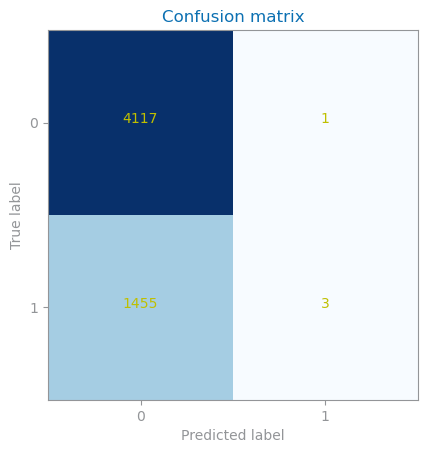

In [134]:
figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()

## mv3 KNN evaluation

### mv3 knn accuracy

KNN best with k=25 and manhattan


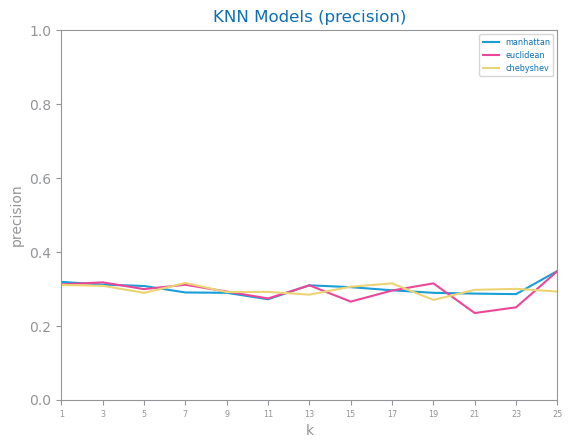

In [135]:
eval_metric = 'precision'

best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

### mv3 knn best performance

<Figure size 640x480 with 0 Axes>

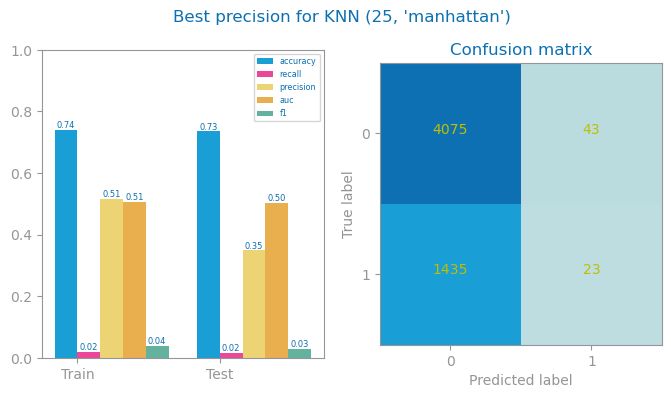

In [136]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

# save to csv

In [137]:
# # choose final version
# data_final=data_1

# # Saving to CSV files
# data_final.to_csv('data/df_merch_mv_input.csv',index=False)
